In [1]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Modeling libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
# Scoring libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, f1_score, precision_score, recall_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

## 1- Load Data

In [2]:
# Load the data from the github repository
url = 'https://raw.githubusercontent.com/AliBadran716/Public-Datasets/main/UCI%20Heart%20Disease%20Data/heart_disease_uci.csv'
df = pd.read_csv(url, delimiter=',')
# Print the first 5 rows of the dataframe 
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# Print the last 5 rows of the dataframe
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


## 2- Exploratory Data Analysis

In [4]:
# Print the descriptive statistics of the dataframe
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
# Print Column Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
# Shape of the dataframe
df.shape

(920, 16)

### 2.1- Age

In [7]:
# Find the minimum and maximum values of the 'id' column in the dataframe
df['id'].min(), df['id'].max()

(1, 920)

In [8]:
# age column
print(f"Minimum age : {df['age'].min()}")
print(f"Maximum age: {df['age'].max()}")
print("\nAge column description:")
df['age'].describe()

Minimum age : 28
Maximum age: 77

Age column description:


count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

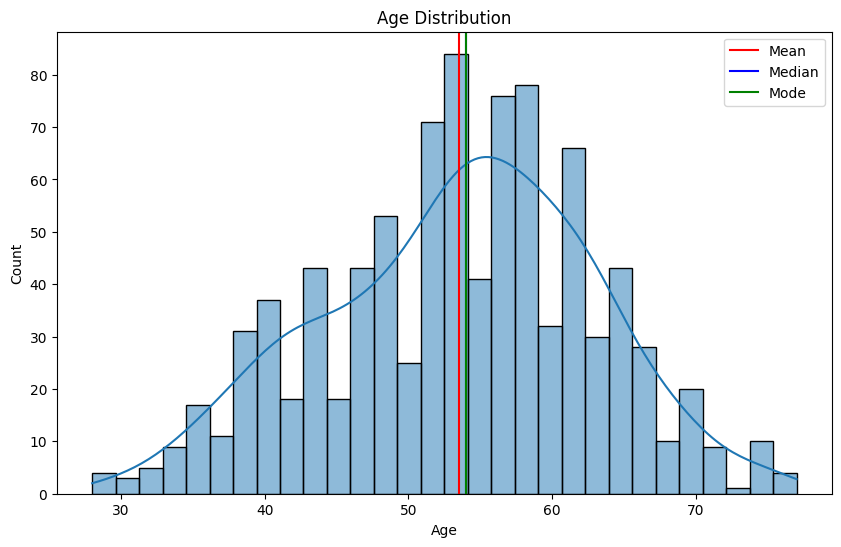

Mean: 53.51086956521739
Median: 54.0
Mode: 54


In [9]:
# Plot mean, median, mode of age
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.axvline(df['age'].mean(), color='red', label='Mean')
plt.axvline(df['age'].median(), color='blue', label='Median')
plt.axvline(df['age'].mode()[0], color='green', label='Mode')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()
# Print the mean, median, mode of age
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [10]:
# Plot age distribution with color based on sex using plotly
fig = px.histogram(df, x='age', color='sex', marginal='box', title='Age Distribution with Color Based on sex')
fig.show()
# Print the Count of each age and the sex of the person at this age
age_sex_counts = df.groupby(['age', 'sex']).size().reset_index(name='count')
print(age_sex_counts)

    age     sex  count
0    28    Male      1
1    29    Male      3
2    30  Female      1
3    31  Female      1
4    31    Male      1
..  ...     ...    ...
86   74    Male      6
87   75    Male      3
88   76  Female      1
89   76    Male      1
90   77    Male      2

[91 rows x 3 columns]


#### Conclusion
- The minimum age to have a heart disease starts from 28 years old.
- Most of the people get heart disease at the age of 53-54 years.
- Most of the males and females get are with heart disease at the age of 54-55 years.
- Male percentage in the data: 78.91%
- Female Percentage in the data: 21.09%
- Males are 274.23% more than females in the data.

### 2.2- Sex

In [11]:
# Print the count of each sex in the dataframe
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [12]:
# calculate male and female count percentage
male_count = df['sex'].value_counts()[0]
female_count = df['sex'].value_counts()[1]
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


In [13]:
# Plot the count of females and maeles in the dataframe
fig = px.pie(df, names='sex', color='sex')
fig.show()

### 2.3- Dataset Column

In [14]:
# find the unique values in dataset column
print(df['dataset'].unique())
print("\n")
print(df['dataset'].value_counts())

['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']


dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


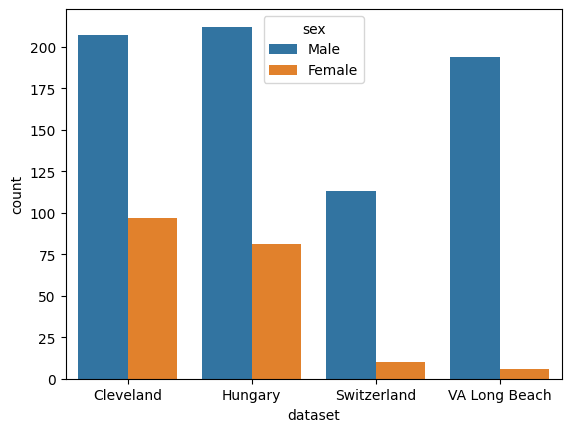

In [15]:
# plot the countplot of dataset column
sns.countplot(data=df, x='dataset', hue = 'sex')

# plots using plotly
fig = px.bar(df, x='dataset', color='sex', title='Location distribution with Color Based on sex')
fig.show()

#values count of dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())

In [16]:
# Plot dataset location distribution with color based on age using plotly
fig = px.scatter(df, x='dataset', y='age', color='age', title='Location Distribution with Age')
fig.update_traces(marker=dict(size=8, opacity=0.6), selector=dict(mode='markers'))
fig.show()
# Print the Count of each age and the sex of the person at this age
print(df.groupby('dataset')['age'].value_counts())


dataset        age
Cleveland      58     19
               57     17
               54     16
               59     14
               52     13
                      ..
VA Long Beach  37      1
               38      1
               42      1
               43      1
               77      1
Name: count, Length: 155, dtype: int64


In [17]:
# make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print(f"Mean of Data Set: {df.groupby('dataset')['age'].mean()}")
print("-------------------------------------")
print(f"Median of Data Set: {df.groupby('dataset')['age'].median()}")
print("-------------------------------------")
print(f"Mode of Data Set: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("-------------------------------------")

Mean of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------
Median of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------
Mode of Data Set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
-------------------------------------


#### Conclusion

- We have highest number of people from Cleveland (304) and lowest from Switzerland (123).
- The highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).
- The highest number of males in this dataset are from Hungary (212) and lowest from Switzerland (113).

##### The Mean Age according to the dataset is :

- Cleveland 54.351974

- Hungary 47.894198

- Switzerland 55.317073

- VA Long Beach 59.350000

##### The Median Age according to the dataset is :

- Cleveland 55.5

- Hungary 49.0

- Switzerland 56.0

- VA Long Beach 60.0

##### The Mode Age according to the dataset is :

- Cleveland 58

- Hungary 54

- Switzerland 61

- VA Long Beach [62, 63]



### 2.4- Chest Pain

#### Values Description
1- Asymptomatic: No chest pain or discomfort.

2- Non-Anginal: Chest pain not typical of heart-related issues; requires further investigation.

3- Atypical Angina: Chest pain with characteristics different from typical heart-related chest pain.

4- Typical Angina: Classic chest pain indicating potential insufficient blood supply to the heart.

In [18]:
# Values count
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [19]:
# Plot the count of cp column
cp_num = pd.crosstab(df.cp,df.num)
cp_num

num,0,1,2,3,4
cp,,,,,
asymptomatic,104,197,89,83,23
atypical angina,150,19,2,3,0
non-anginal,131,37,14,18,4
typical angina,26,12,4,3,1


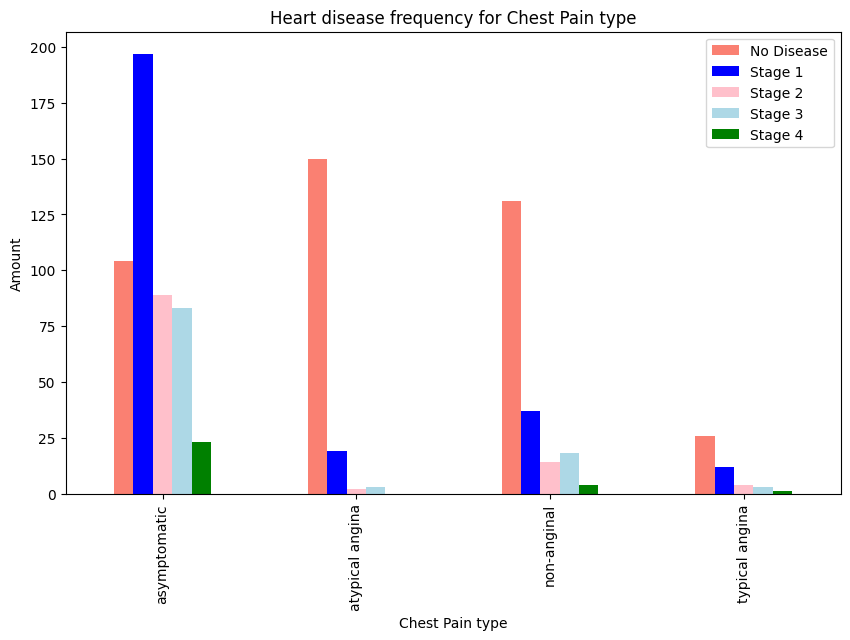

In [20]:
# use crosstab to plot the count of chest pain type and heart disease
pd.crosstab(df.cp,df.num).plot(kind="bar",figsize=(10,6), 
                               color = ['salmon','blue','pink','lightblue','green'])
plt.title('Heart disease frequency for Chest Pain type')
plt.xlabel('Chest Pain type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])

In [21]:
# Plot dataset location distribution with color based on sex using plotly
fig = px.histogram(df, x='cp', color='sex', marginal='box', title='Chest Pain Type distribution with Color Based on sex')
fig.show()
# Print the Count of each age and the sex of the person at this age
cp_sex_counts = df.groupby(['sex', 'cp']).size().reset_index(name='count')
print(cp_sex_counts)

      sex               cp  count
0  Female     asymptomatic     70
1  Female  atypical angina     61
2  Female      non-anginal     53
3  Female   typical angina     10
4    Male     asymptomatic    426
5    Male  atypical angina    113
6    Male      non-anginal    151
7    Male   typical angina     36


                 cp        dataset  count
0      asymptomatic      Cleveland    144
1      asymptomatic        Hungary    123
2      asymptomatic    Switzerland     98
3      asymptomatic  VA Long Beach    131
4   atypical angina      Cleveland     51
5   atypical angina        Hungary    105
6   atypical angina    Switzerland      4
7   atypical angina  VA Long Beach     14
8       non-anginal      Cleveland     86
9       non-anginal        Hungary     54
10      non-anginal    Switzerland     17
11      non-anginal  VA Long Beach     47
12   typical angina      Cleveland     23
13   typical angina        Hungary     11
14   typical angina    Switzerland      4
15   typical angina  VA Long Beach      8


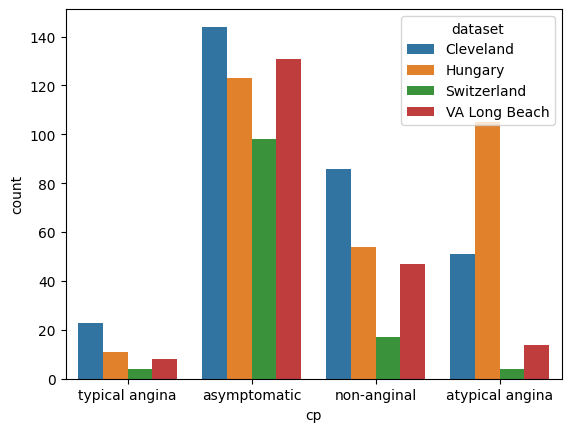

In [22]:
# count plot of cp column with dataset(countires) column
sns.countplot(df, x='cp', hue='dataset')
# Print the Count of cp and the dataset of the person at this cp
cp_dataset_counts = df.groupby(['cp', 'dataset']).size().reset_index(name='count')
print(cp_dataset_counts)

In [23]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='age', color='cp', title='Age Distribution with Color Based on Chest Pain Type')
fig.show()
# Print the Count of each age and the cp of the person at this age
print(df.groupby('cp')['age'].value_counts())

cp              age
asymptomatic    57     27
                58     23
                60     22
                59     22
                54     22
                       ..
typical angina  32      1
                35      1
                38      1
                40      1
                74      1
Name: count, Length: 156, dtype: int64


In [24]:
# draw the plot of cp column grouped by num column using plotly
fig = px.histogram(data_frame=df, x='cp', color='num', title='Chest Pain Type Distribution with Color Based on Heart Disease')
fig.show()

#### Conclusion
- A total of 104 individuals are identified as having neither chest pain nor heart disease.

- Only 23 individuals are found to have no chest pain while experiencing critical heart disease.

- A group of 83 individuals is observed to be free from chest pain while having severe heart disease.

- In the dataset, 197 individuals are noted for having no chest pain and exhibiting mild heart disease.

- Among the individuals, 89 have no chest pain while presenting with moderate heart disease.

### 2.5- Resting Blood Pressure

In [25]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [26]:
# Plotting Resting Blood Pressure vs Disease with a Boxplot
fig = go.Figure()
fig.add_trace(go.Box(y=df['trestbps'].values , name='BP at Rest for all', marker_color = 'green',boxmean=True))
fig.add_trace(go.Box(y=df[df['num']== 0]['trestbps'].values, name ='No Disease', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=df[df['num'] !=0]['trestbps'].values, name ='Heart Disease', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'BP Distribution (at rest)', yaxis_title = 'Blood Pressure (mm/Hg)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

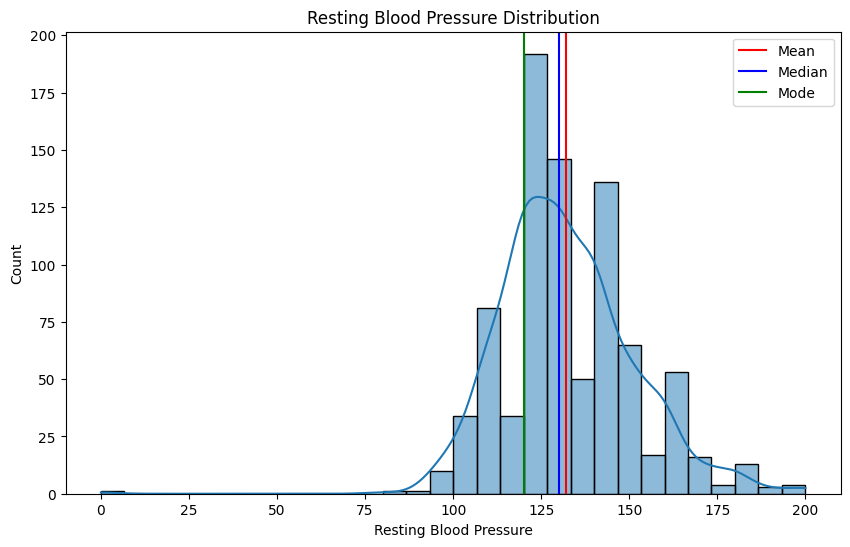

Mean: 132.13240418118468
Median: 130.0
Mode: 120.0


In [27]:
# Plot mean, median, mode of trestbps
plt.figure(figsize=(10,6))
sns.histplot(df['trestbps'], bins=30, kde=True)
plt.axvline(df['trestbps'].mean(), color='red', label='Mean')
plt.axvline(df['trestbps'].median(), color='blue', label='Median')
plt.axvline(df['trestbps'].mode()[0], color='green', label='Mode')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.legend()
plt.show()
# Print the mean, median, mode of trestbps
print('Mean:', df['trestbps'].mean())
print('Median:', df['trestbps'].median())
print('Mode:', df['trestbps'].mode()[0])

In [28]:
# Scatter plot of trestbps column by age column and coloring with dataset column
fig = px.scatter(data_frame=df, x='age', y='trestbps', color='dataset', symbol='sex', symbol_map={'male': 'square', 'female': 'circle'})
fig.update_layout(title='Resting Blood Pressure vs Age vs Sex', xaxis_title='Age', yaxis_title='Resting Blood Pressure')
fig.show()

### 2.6- Cholestrol column

In [29]:
# Print the statistical description of the chol column
df['chol'].describe()

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

In [30]:
# Print the distribution and statistical properties of the contingency table created by the cross-tabulation of cholesterol levels and the target variable. 
cross = pd.crosstab(df['chol'], df['num']).describe()
cross

num,0,1,2,3,4
count,217.000000,217.000000,217.000000,217.000000,217.000000
mean,1.806452,1.188940,0.493088,0.488479,0.124424
std,2.015990,4.268345,3.152189,2.619568,0.507538
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,1.000000,0.000000
max,20.000000,62.000000,46.000000,38.000000,6.000000


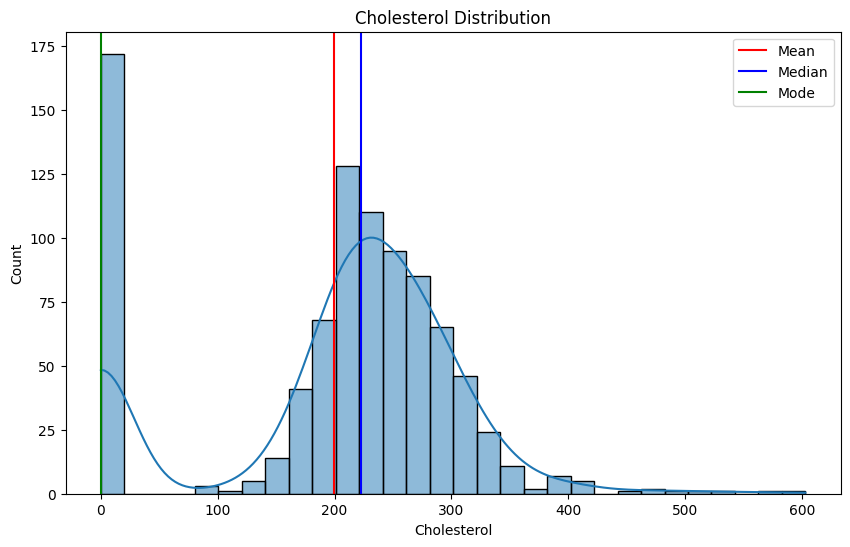

Mean: 199.13033707865168
Median: 223.0
Mode: 0.0


In [31]:
# Plot mean, median, mode of chol
plt.figure(figsize=(10,6))
sns.histplot(df['chol'], bins=30, kde=True)
plt.axvline(df['chol'].mean(), color='red', label='Mean')
plt.axvline(df['chol'].median(), color='blue', label='Median')
plt.axvline(df['chol'].mode()[0], color='green', label='Mode')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.legend()
plt.show()
# Print the mean, median, mode of chol
print('Mean:', df['chol'].mean())
print('Median:', df['chol'].median())
print('Mode:', df['chol'].mode()[0])

In [32]:
# Scatter plot of chol column by age column and coloring with dataset column and sex
fig = px.scatter(data_frame=df, x='age', y='chol', color='dataset', symbol='sex', symbol_map={'male': 'square', 'female': 'circle'})
fig.update_layout(title='Cholesterol vs Age by Dataset and Sex', xaxis_title='Age', yaxis_title='Cholesterol')
fig.show()

<Axes: ylabel='chol'>

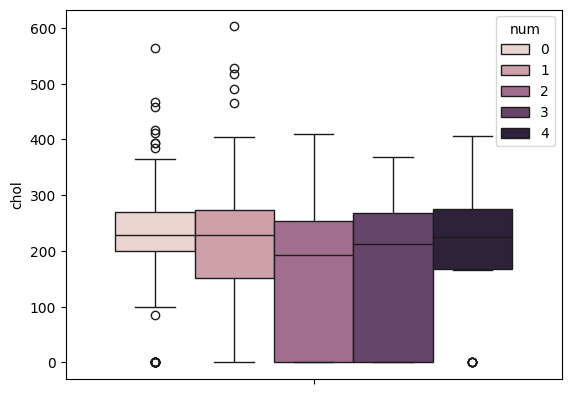

In [33]:
# Boxplot of cholesterol levels by heart disease
sns.boxplot(y=df['chol'], hue=df['num'])

In [34]:
# draw the plot of chol column grouped by num column using plotly
fig = go.Figure()
fig.add_trace(go.Violin(y=df['chol'].values , name='All Patient', marker_color = 'green'))
fig.add_trace(go.Violin(y=df[df['num']== 0]['chol'].values, name ='No Disease', marker_color = 'blue'))
fig.add_trace(go.Violin(y=df[df['num'] == 4]['chol'].values, name ='Heart Disease', marker_color = 'red'))
fig.update_layout(title = 'Cholesterol Level Distribution', yaxis_title = 'Cholesterol Level', title_x = 0.5 )
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

### 2.7- Fasting Blood Sugar Column

In [35]:
# Print the value counts of fbs column
df['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

In [36]:
# Plot the count of fbs in the dataframe
fig = px.pie(df, names='fbs', color='fbs', title='Fasting Blood Sugar Distribution')
fig.show()

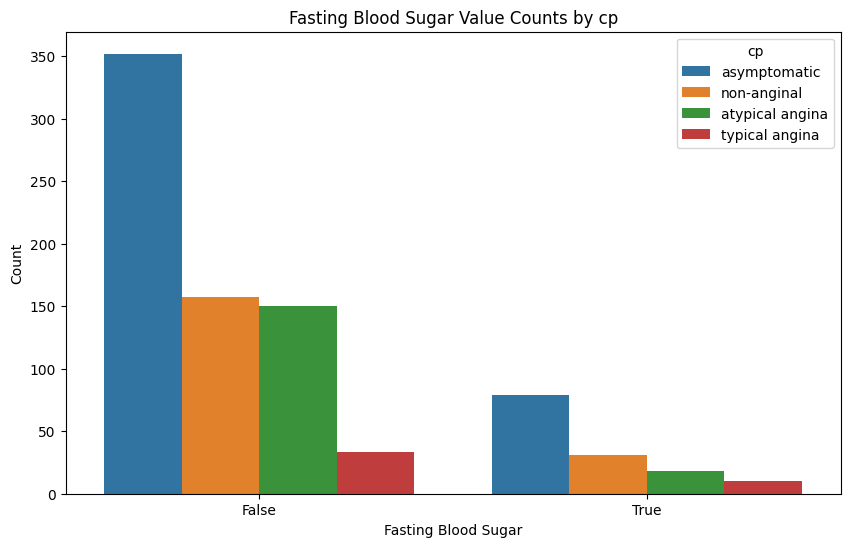

     fbs               cp  count
0  False     asymptomatic    352
1  False  atypical angina    150
2  False      non-anginal    157
3  False   typical angina     33
4   True     asymptomatic     79
5   True  atypical angina     18
6   True      non-anginal     31
7   True   typical angina     10


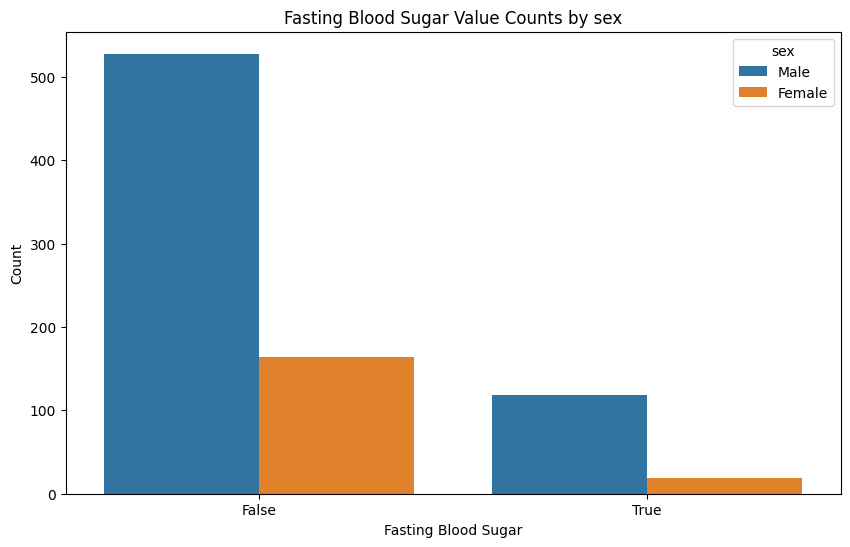

     fbs     sex  count
0  False  Female    164
1  False    Male    528
2   True  Female     19
3   True    Male    119


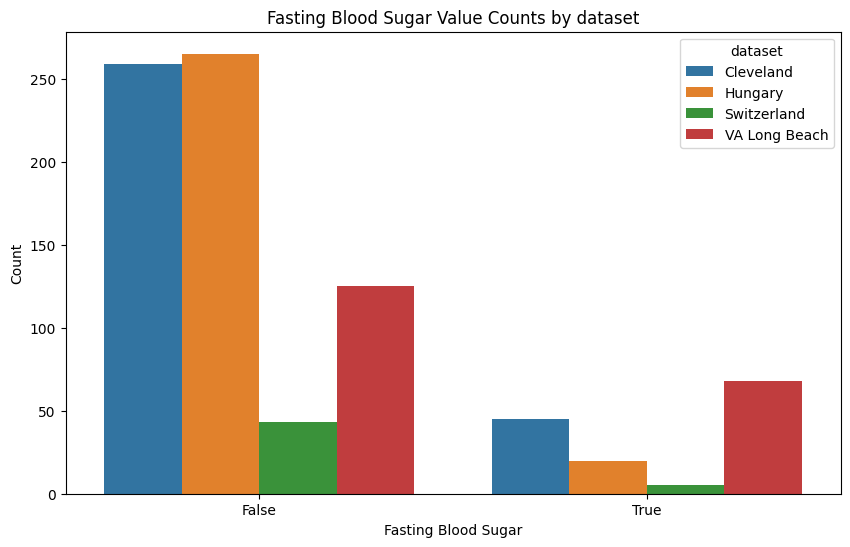

     fbs        dataset  count
0  False      Cleveland    259
1  False        Hungary    265
2  False    Switzerland     43
3  False  VA Long Beach    125
4   True      Cleveland     45
5   True        Hungary     20
6   True    Switzerland      5
7   True  VA Long Beach     68


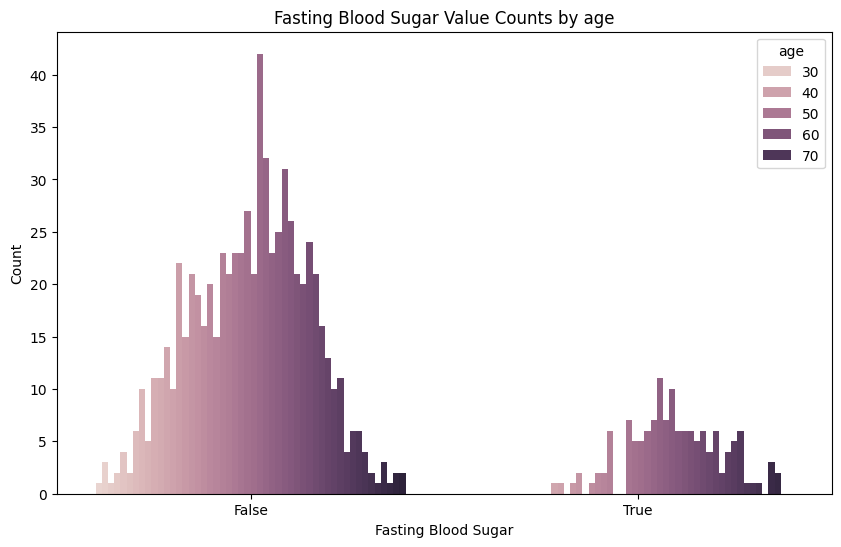

      fbs  age  count
0   False   28      1
1   False   29      3
2   False   30      1
3   False   31      2
4   False   32      4
..    ...  ...    ...
77   True   70      1
78   True   71      1
79   True   72      1
80   True   74      3
81   True   75      2

[82 rows x 3 columns]


In [37]:
# Plot Fasting Blood Sugar value counts distribution with cp, sex, dataset and age independent plots
for col in ['cp', 'sex', 'dataset', 'age']:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df, x='fbs', hue=col)
  plt.title(f'Fasting Blood Sugar Value Counts by {col}')
  plt.xlabel('Fasting Blood Sugar')
  plt.ylabel('Count')
  plt.xticks(rotation=0)  # Rotate x-axis labels if needed
  plt.show()
  # Print the Count of each age and the col
  fbs_col_counts = df.groupby(['fbs', col]).size().reset_index(name='count')
  print(fbs_col_counts)

### 2.8- ECG observation at resting condition Column

In [38]:
# Print the value counts of restecg column
df['restecg'].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

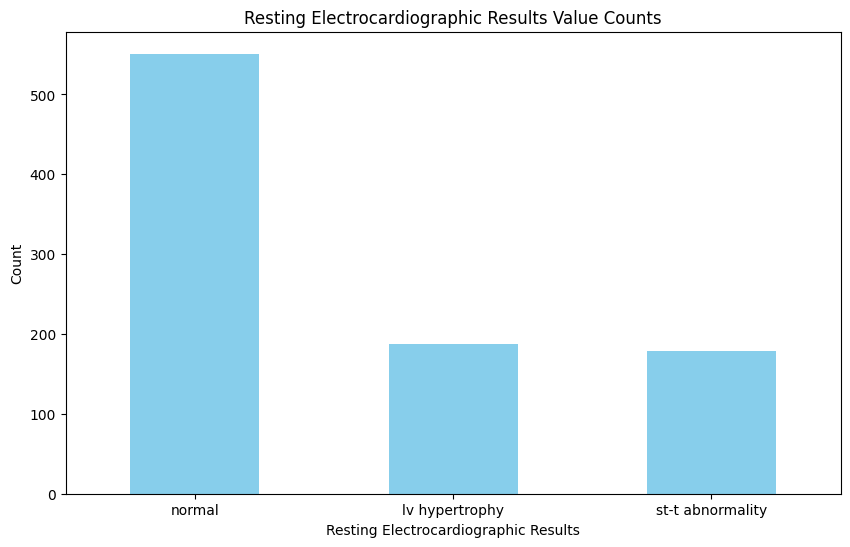

In [39]:
# Plot Resting Electrocardiographic Results value counts distribution
plt.figure(figsize=(10,6))
df['restecg'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Resting Electrocardiographic Results Value Counts')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

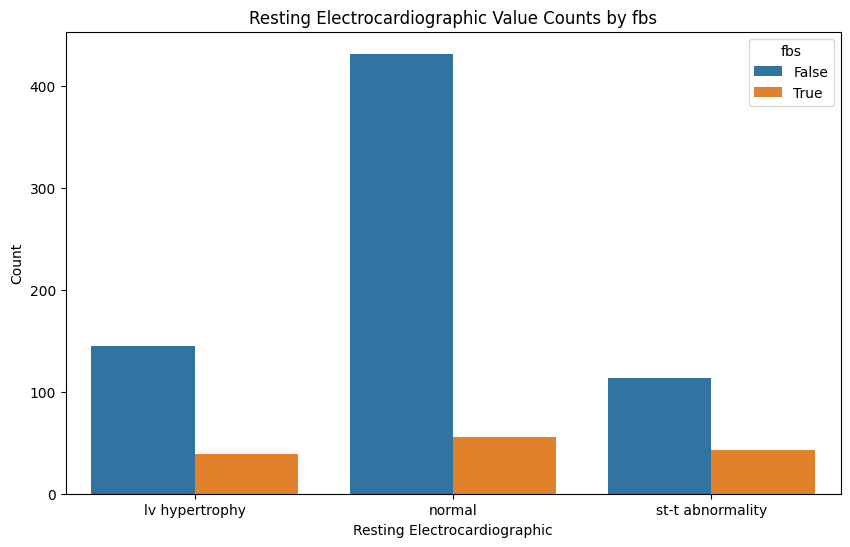

            restecg    fbs  count
0    lv hypertrophy  False    145
1    lv hypertrophy   True     39
2            normal  False    432
3            normal   True     56
4  st-t abnormality  False    114
5  st-t abnormality   True     43


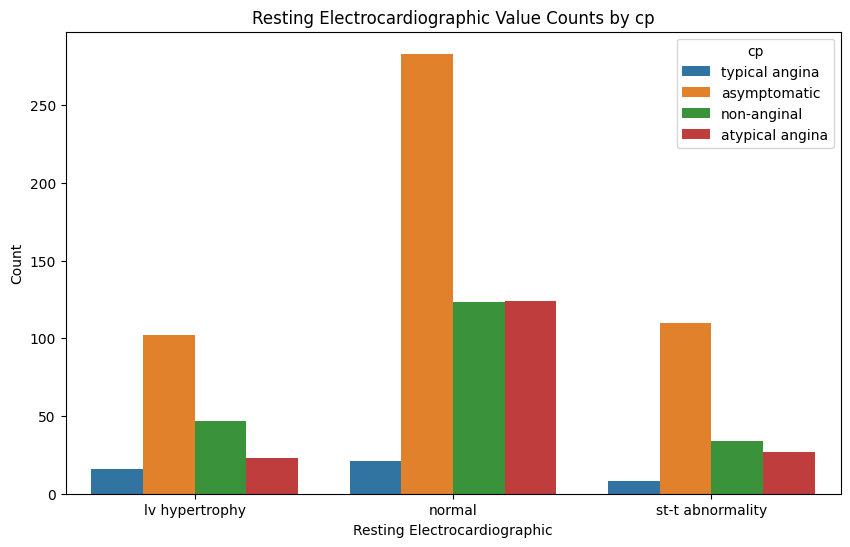

             restecg               cp  count
0     lv hypertrophy     asymptomatic    102
1     lv hypertrophy  atypical angina     23
2     lv hypertrophy      non-anginal     47
3     lv hypertrophy   typical angina     16
4             normal     asymptomatic    283
5             normal  atypical angina    124
6             normal      non-anginal    123
7             normal   typical angina     21
8   st-t abnormality     asymptomatic    110
9   st-t abnormality  atypical angina     27
10  st-t abnormality      non-anginal     34
11  st-t abnormality   typical angina      8


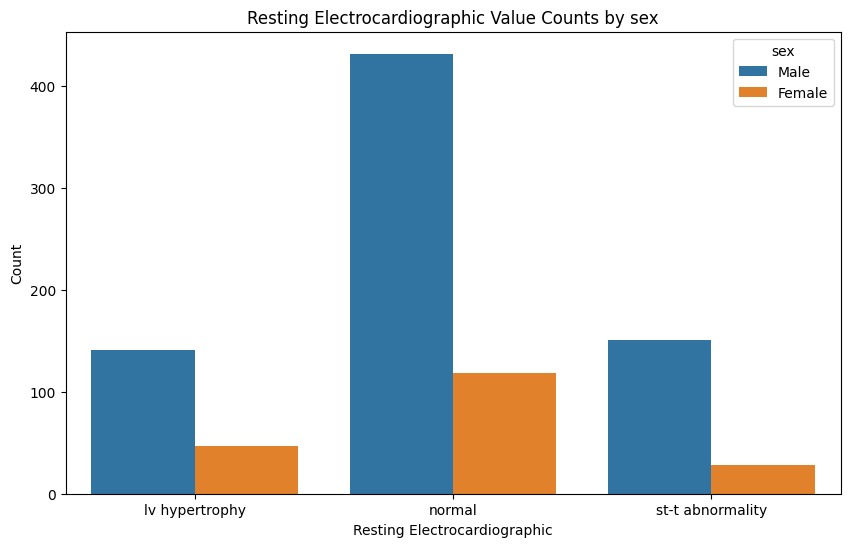

            restecg     sex  count
0    lv hypertrophy  Female     47
1    lv hypertrophy    Male    141
2            normal  Female    119
3            normal    Male    432
4  st-t abnormality  Female     28
5  st-t abnormality    Male    151


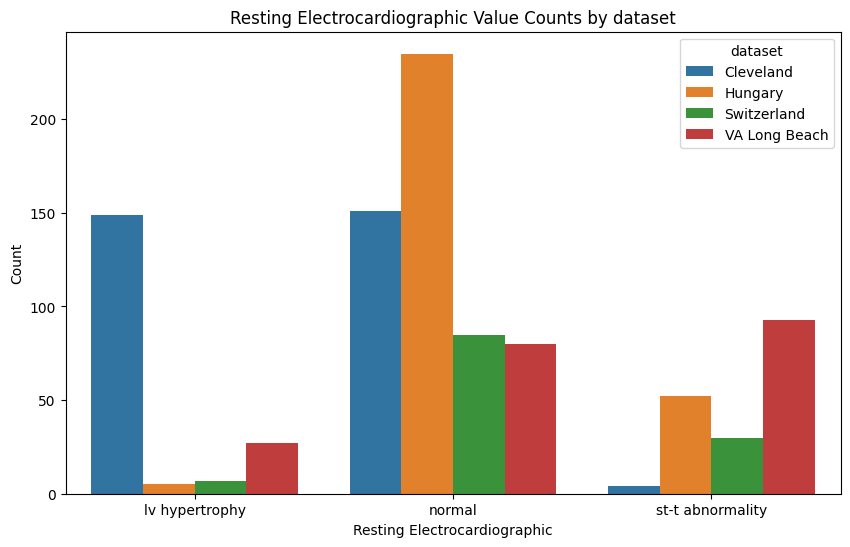

             restecg        dataset  count
0     lv hypertrophy      Cleveland    149
1     lv hypertrophy        Hungary      5
2     lv hypertrophy    Switzerland      7
3     lv hypertrophy  VA Long Beach     27
4             normal      Cleveland    151
5             normal        Hungary    235
6             normal    Switzerland     85
7             normal  VA Long Beach     80
8   st-t abnormality      Cleveland      4
9   st-t abnormality        Hungary     52
10  st-t abnormality    Switzerland     30
11  st-t abnormality  VA Long Beach     93


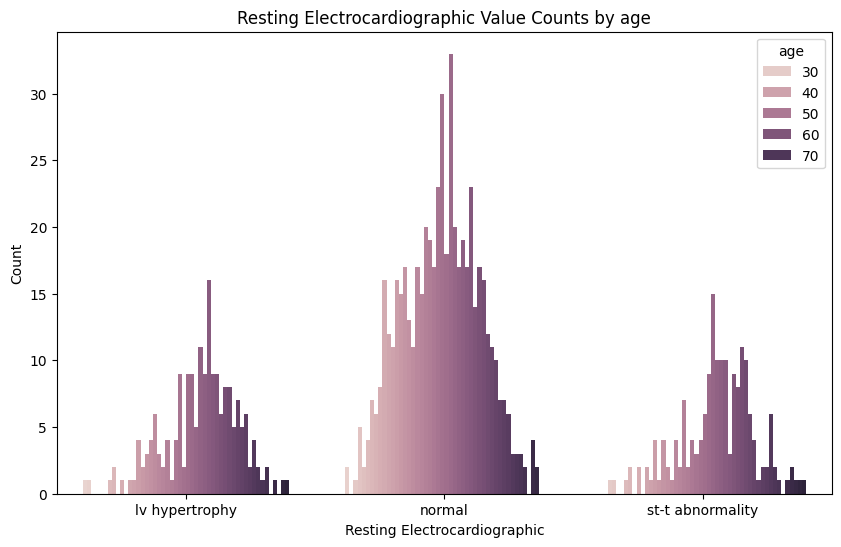

              restecg  age  count
0      lv hypertrophy   28      1
1      lv hypertrophy   29      1
2      lv hypertrophy   34      1
3      lv hypertrophy   35      2
4      lv hypertrophy   37      1
..                ...  ...    ...
125  st-t abnormality   73      1
126  st-t abnormality   74      2
127  st-t abnormality   75      1
128  st-t abnormality   76      1
129  st-t abnormality   77      1

[130 rows x 3 columns]


In [40]:
# Plot restecg value counts distribution with fbs, cp, sex, dataset and age independent plots
for col in ['fbs','cp', 'sex', 'dataset', 'age']:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df, x='restecg', hue=col)
  plt.title(f'Resting Electrocardiographic Value Counts by {col}')
  plt.xlabel('Resting Electrocardiographic')
  plt.ylabel('Count')
  plt.xticks(rotation=0)  # Rotate x-axis labels if needed
  plt.show()
  # Print the Count of each age and the col
  restecg_col_counts = df.groupby(['restecg', col]).size().reset_index(name='count')
  print(restecg_col_counts)

### 2.9- Thalesmia Column

In [41]:
# Print the value counts of thalach column
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [42]:
# Group by thal by sex
df.groupby('thal')['sex'].value_counts()

thal               sex   
fixed defect       Male       42
                   Female      4
normal             Male      110
                   Female     86
reversable defect  Male      171
                   Female     21
Name: count, dtype: int64

In [43]:
# Groupby Thal by Dataset(Countries)
df.groupby('thal')['dataset'].value_counts()

thal               dataset      
fixed defect       Cleveland         18
                   Hungary           10
                   Switzerland       10
                   VA Long Beach      8
normal             Cleveland        166
                   Switzerland       19
                   Hungary            7
                   VA Long Beach      4
reversable defect  Cleveland        117
                   Switzerland       42
                   VA Long Beach     22
                   Hungary           11
Name: count, dtype: int64

<Axes: xlabel='thal', ylabel='count'>

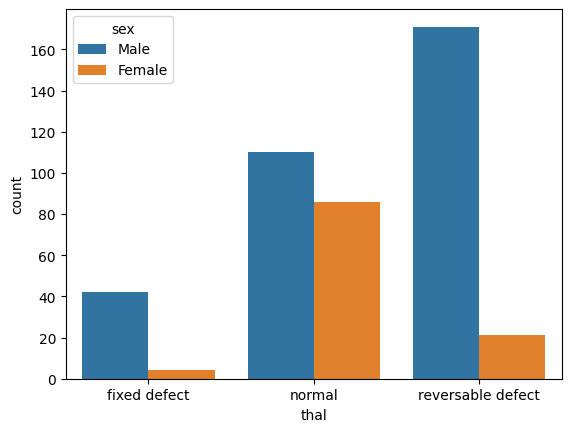

In [44]:
# count plot of cp column by dataset column
sns.countplot(df, x='thal', hue='sex')

In [45]:
# draw the plot of thal column grouped by age column using plotly
fig = px.histogram(data_frame=df, x='age', color='thal')
fig.show()

In [46]:
# draw the plot of thal column grouped by age column using plotly
fig = px.histogram(data_frame=df, x='thal', color='dataset')
fig.show()

<Axes: xlabel='thal', ylabel='count'>

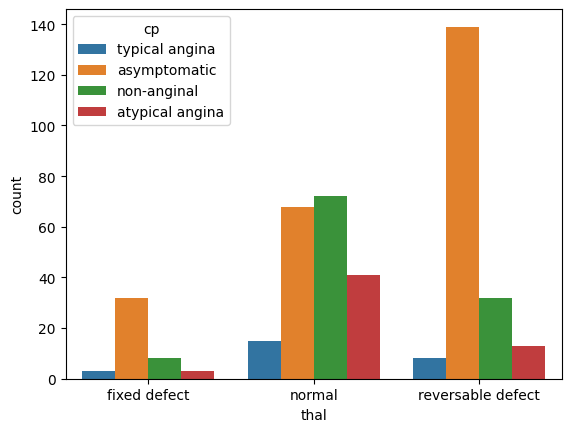

In [47]:
# Plot or groupby to check the people who have thal does the have cp or not
df.groupby('thal')['cp'].value_counts()
#Visualize
sns.countplot(df, x='thal', hue='cp')

<Axes: xlabel='thal', ylabel='count'>

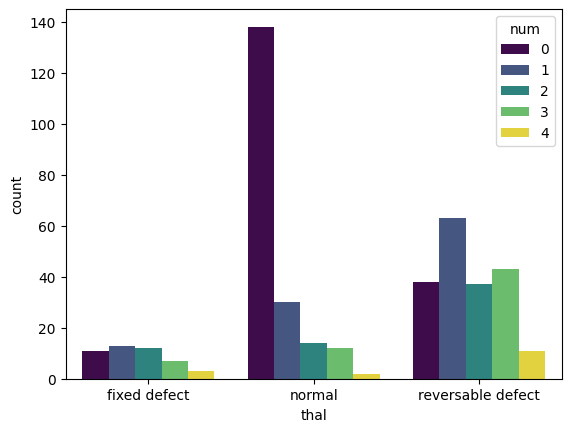

In [48]:
# Now Check People with Thal Survive or Not 
df.groupby('thal')['num'].value_counts()
# Plot to Visualize
sns.countplot(df, x='thal', hue='num' , palette='viridis')

#### Conclusion
- Among the individuals, 110 males and 86 females are classified as normal.
- A total of 42 males and 4 females exhibit a fixed defect.
- In the dataset, 171 males and 21 females are identified with a reversible defect. The higher ratio of males compared to females is attributed to the dataset's male predominance.
- Both individuals with thalassemia and those with normal thalassemia experience chest pain.
- Individuals with normal thalassemia often exhibit a higher ratio of being free from heart disease, although some may still experience heart-related conditions.
- Those with thalassemia generally have an increased likelihood of heart disease, yet some individuals with thalassemia do not develop such health issues.

### 2.8- Target Column

Values Categories

0 = no heart disease

1 = mild heart disease

2 = moderate heart disease

3 = severe heart disease

4 = critical heart disease


In [49]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

<Axes: xlabel='num', ylabel='count'>

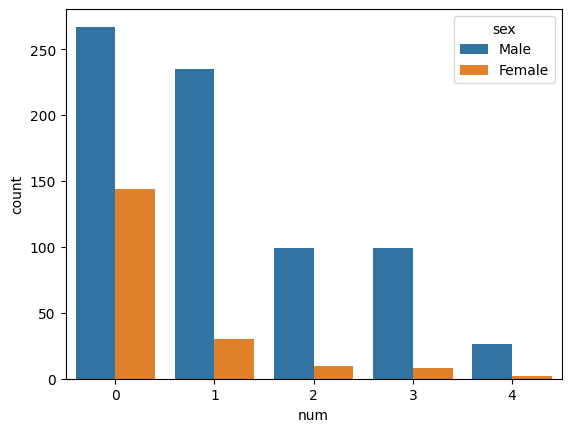

In [50]:
# Groupby num with sex 
df.groupby('num')['sex'].value_counts()
# Plot to Visualize
sns.countplot(df, x='num', hue='sex')

<Axes: xlabel='age', ylabel='Count'>

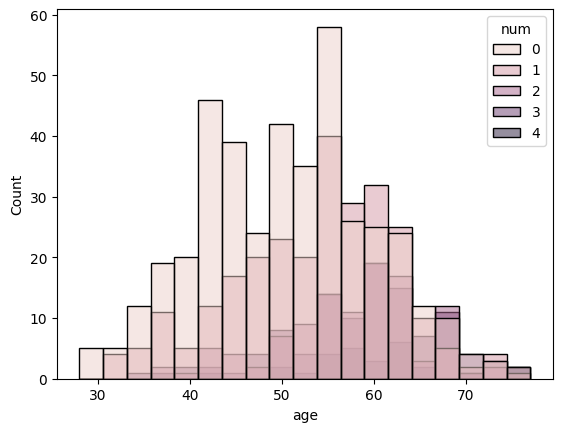

In [51]:
# groupby num by age 
df.groupby('num')['age'].value_counts()
# Plot to Visualize
sns.histplot(df, x='age', hue='num')

In [52]:
# Make Histplot using Plotly 
px.histogram(data_frame=df, x='age', color='num')

### Conclusion
- Men exhibit a higher ratio of being disease-free, while females show a lower ratio in the dataset.

- Conversely, based on the dataset, men are more affected by diseases compared to women. </h3>

## 3-Dealing with outliers, Missing values and Duplicates

In [53]:
# define categorical and numeric columns
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

#### Outliers



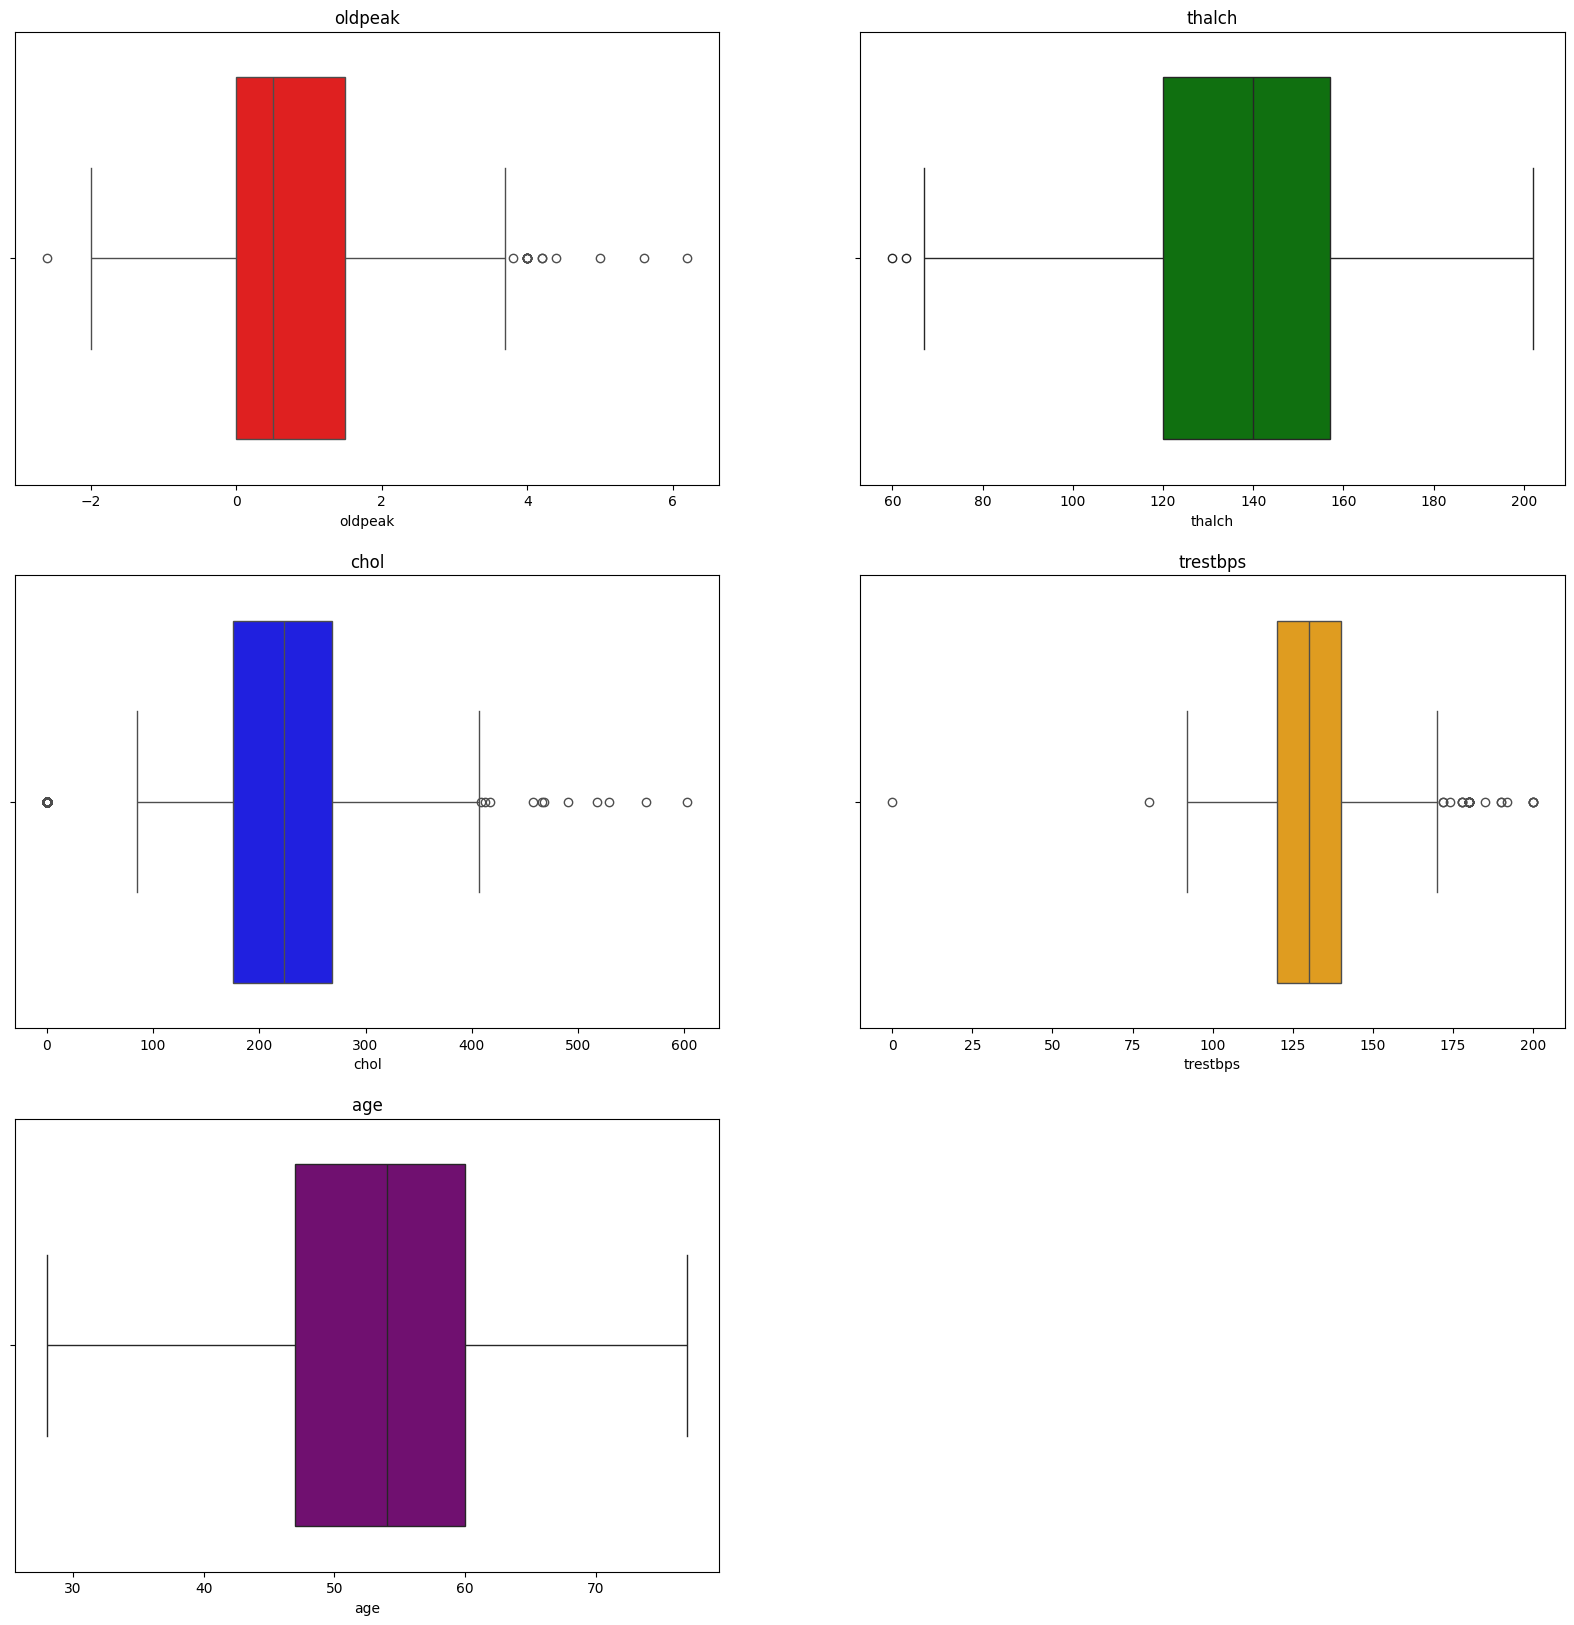

In [54]:
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [55]:
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

In [56]:
# remove the row from data with 0 trestbps as it is obviously an error in the data
df = df[df['trestbps'] != 0]

- The rest of outliers in this dataset gives us a lot of information about the data, so we wont remove any of them.

#### Missing Values
- This dataset have some columns with higher missing values ratios, so we use advanced methods to impute them.
    - We use iterative imputer to impute the missing values with Random forest classifier and Random Forest Regressor.

In [57]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [58]:
#Function to impute missing values in categorical columns
def impute_categorical_missing_data(selected_col):
    df_null = df[df[selected_col].isnull()] # select rows with null values in the column
    df_not_null = df[df[selected_col].notnull()] # select rows with not null values in the column

    X = df_not_null.drop(selected_col, axis=1) # select all rows except the column we want to impute
    y = df_not_null[selected_col] # select the column we want to impute
    
    other_missing_cols = [col for col in missing_data_cols if col != selected_col] # select all columns except the column we want to impute
    
    label_encoder = LabelEncoder() # instantiate label encoder

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category': # check if the column is categorical not numeric
            X[col] = label_encoder.fit_transform(X[col]) # encode the column to allow for imputation

    if selected_col in bool_cols:
        y = label_encoder.fit_transform(y) # encode the column to allow for imputation
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True) # instantiate iterative imputer

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0: # check if the column has missing values
            col_with_missing_values = X[col].values.reshape(-1, 1) 
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values) # impute missing values
            X[col] = imputed_values[:, 0] # replace missing values with imputed values
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split data into training and testing sets

    rf_classifier = RandomForestClassifier() # instantiate random forest classifier for categorical columns

    rf_classifier.fit(X_train, y_train) # fit the model

    y_pred = rf_classifier.predict(X_test) # make predictions

    acc_score = accuracy_score(y_test, y_pred) # calculate accuracy

    print("The feature '"+ selected_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n") 

    X = df_null.drop(selected_col, axis=1) # select all rows except the column we want to impute

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category': # check if the column is categorical not numeric
            X[col] = label_encoder.fit_transform(X[col]) # encode the column to allow for imputation
 
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0: # check if the column has missing values
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values) # impute missing values
            X[col] = imputed_values[:, 0] # replace missing values with imputed values
        else:
            pass
                
    if len(df_null) > 0: # check if there are any rows with null values
        df_null[selected_col] = rf_classifier.predict(X) # predict missing values using the random forest classifier
        if selected_col in bool_cols: # check if the column is boolean
            df_null[selected_col] = df_null[selected_col].map({0: False, 1: True}) # map 0 and 1 to False and True
        else:
            pass 
    else:
        pass # if there are no rows with null values, do nothing

    df_combined = pd.concat([df_not_null, df_null]) # combine the imputed and non-imputed dataframes
    
    return df_combined[selected_col]

In [59]:
#Function to impute missing values in numeric columns
def impute_numerical_missing_data(selected_col):
    df_null = df[df[selected_col].isnull()] # select rows with null values in the column
    df_not_null = df[df[selected_col].notnull()] # select rows with not null values in the column

    X = df_not_null.drop(selected_col, axis=1) # select all rows except the column we want to impute
    y = df_not_null[selected_col] # select the column we want to impute
    
    other_missing_cols = [col for col in missing_data_cols if col != selected_col] # select all columns except the column we want to impute
    
    label_encoder = LabelEncoder() # instantiate label encoder

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category': # check if the column is categorical not numeric
            X[col] = label_encoder.fit_transform(X[col]) # encode the column to allow for imputation
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True) # instantiate iterative imputer

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0: # check if the column has missing values
            col_with_missing_values = X[col].values.reshape(-1, 1) 
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values) # impute missing values
            X[col] = imputed_values[:, 0] # replace missing values with imputed values
        else:
            pass # if the column has no missing values, do nothing
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split data into training and testing sets

    rf_regressor = RandomForestRegressor() # instantiate random forest regressor for numeric columns

    rf_regressor.fit(X_train, y_train) # fit the model

    y_pred = rf_regressor.predict(X_test) # make predictions

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n") # calculate mean absolute error
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n") # calculate root mean squared error
    print("R2 =", r2_score(y_test, y_pred), "\n") # calculate R-squared

    X = df_null.drop(selected_col, axis=1) # select all rows except the column we want to impute

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category': # check if the column is categorical not numeric
            X[col] = label_encoder.fit_transform(X[col]) # encode the column to allow for imputation

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0: # check if the column has missing values
            col_with_missing_values = X[col].values.reshape(-1, 1) 
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values) # impute missing values
            X[col] = imputed_values[:, 0] # replace missing values with imputed values
        else:
            pass # if the column has no missing values, do nothing
                
    if len(df_null) > 0:  # check if there are any rows with null values
        df_null[selected_col] = rf_regressor.predict(X) # predict missing values using the random forest regressor
    else:
        pass # if there are no rows with null values, do nothing

    df_combined = pd.concat([df_not_null, df_null]) # combine the imputed and non-imputed dataframes
    
    return df_combined[selected_col]

In [60]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False) 

ca          610
thal        485
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

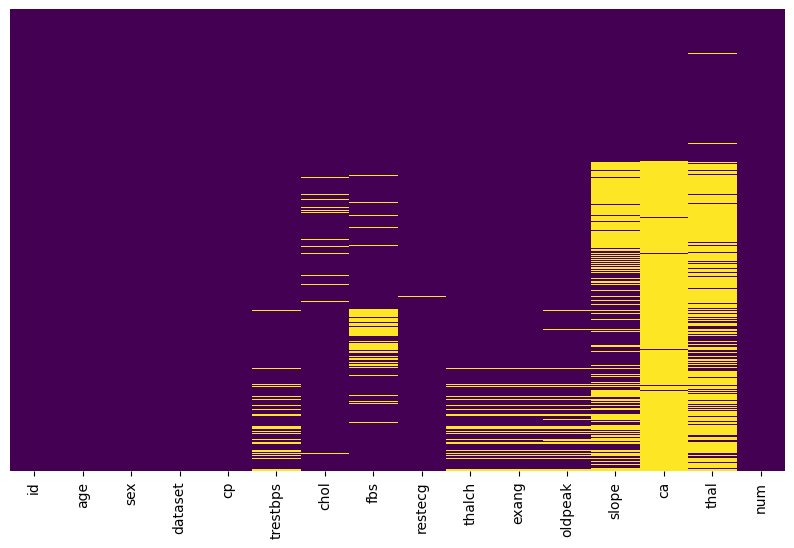

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

In [62]:
# impute missing values
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_numerical_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.42%
MAE = 13.024418604651164 

RMSE = 16.855250820814213 

R2 = 0.11725525007270576 

Missing Values chol : 3.26%
MAE = 43.416011235955054 

RMSE = 58.72362892243824 

R2 = 0.7033097931155603 

Missing Values fbs : 9.79%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.22 accuracy

Missing Values thalch : 5.98%
MAE = 16.79208092485549 

RMSE = 21.763735188706967 

R2 = 0.35589189836430557 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values oldpeak : 6.75%
MAE = 0.5293837209302326 

RMSE = 0.7716701458223509 

R2 = 0.4286610878465684 

Missing Values slope : 33.62%
The feature 'slope' has been imputed with 71.31 accuracy

Missing Values ca : 66.38%
The feature 'ca' has been imputed with 62.9 accuracy

Missing Values thal : 52.77%
The feature 'thal' has been imputed with 70.11 accuracy



In [63]:
#check for missing values after imputing
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

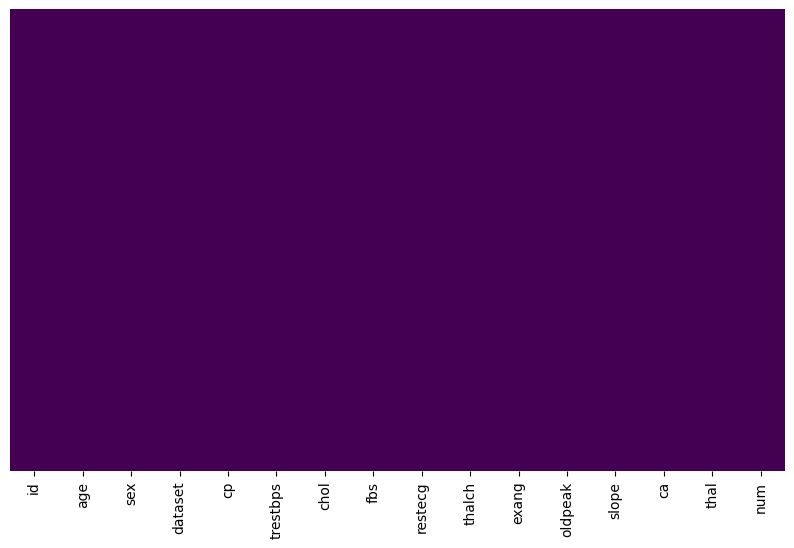

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

#### Checking for Duplicates

In [65]:
df.duplicated().sum()

0

In [66]:
#Rename attributes for consistency 
#Removing any spaces in the names an encoding boolean values
data = df.copy()


data['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
data['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)
data['restecg'].replace({'normal': 'normal' , 'st-t abnormality': 'ST-T_wave_abnormality' , 'lv hypertrophy': 'left_ventricular_hypertrophy' }, inplace =True)

# Genrating New Dataset with Less Columns Which Are Necessary .
data_1 = data[['age','sex','cp','dataset', 'trestbps', 'chol', 'fbs','restecg' , 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
# Some Changes in Target Variable | Only Two Categories (0,1) . 0 for No-Disease , 1 for Disease
data_1['target'] = ((data['num'] > 0)*1).copy()
# Encoding Sex 
data_1['sex'] = (data['sex'] == 'Male')*1
# Encoding Fbs and exang
data_1['fbs'] = (data['fbs'])*1
data_1['exang'] = (data['exang'])*1

# Renaming Columns Names

data_1.columns = ['age', 'sex', 'chest_pain_type','country' ,'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar','Restecg',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']
# Load Data Sample 
data_1.head()

,age,sex,chest_pain_type,country,resting_blood_pressure,cholesterol,fasting_blood_sugar,Restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,typical_angina,Cleveland,145.0,233.0,1,left_ventricular_hypertrophy,150.0,0,2.3,downsloping,0.0,fixed_defect,0
1,67,1,asymptomatic,Cleveland,160.0,286.0,0,left_ventricular_hypertrophy,108.0,1,1.5,flat,3.0,normal,1
2,67,1,asymptomatic,Cleveland,120.0,229.0,0,left_ventricular_hypertrophy,129.0,1,2.6,flat,2.0,reversable_defect,1
3,37,1,non-anginal,Cleveland,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical_angina,Cleveland,130.0,204.0,0,left_ventricular_hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


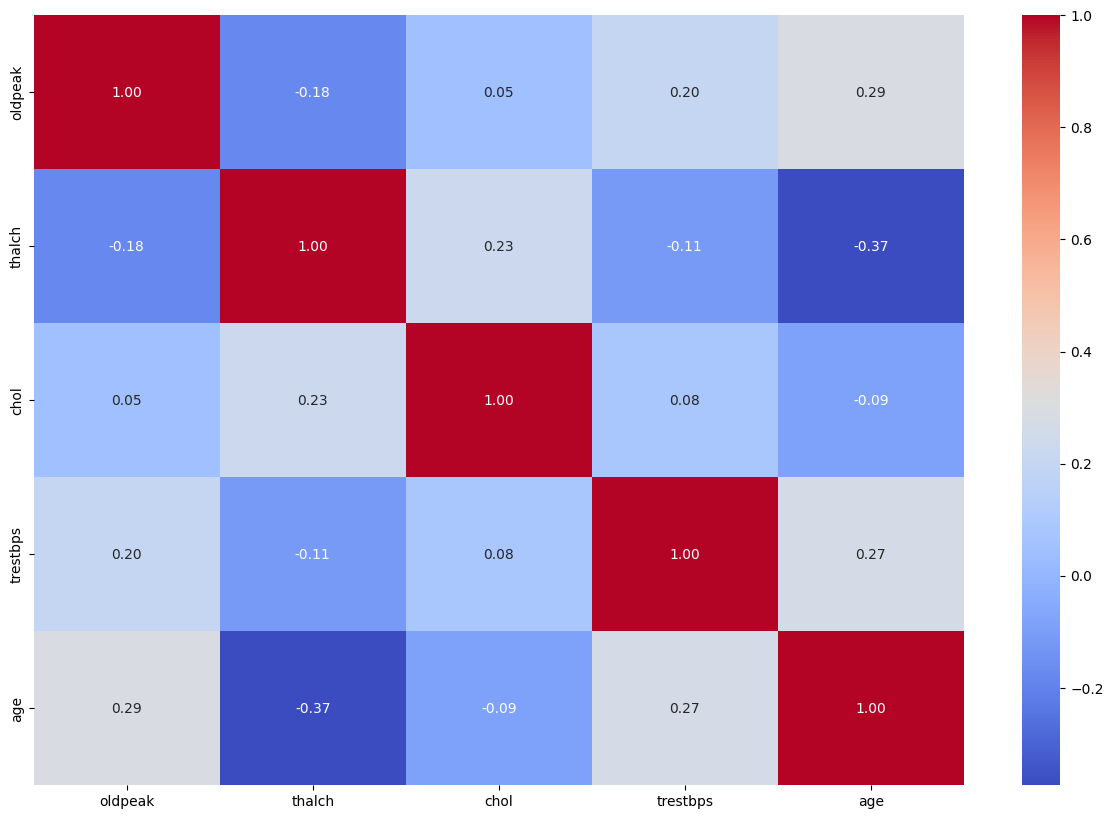

In [67]:
# correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")    
plt.show()

## 4-Modeling

In [68]:
def logistic_regression(data):
  """
  Perform logistic regression on the given dataset.

  Parameters:
  - data: pandas DataFrame
    The input dataset containing the features and target variable.

  Returns:
  - None

  This function performs logistic regression by encoding categorical variables, scaling numerical variables,
  splitting the dataset into training and testing sets, and fitting a logistic regression model.
  It then prints the accuracy of the model on the training and test sets.
  """
  X= data_1.drop('target', axis=1)
  y = data_1['target']
  label_ecoders = {}  # Dictionary to store label_ecoders
  for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
      le = LabelEncoder()
      le.fit(X[col])
      X[col] = le.transform(X[col])
      label_ecoders[col] = le
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

  scaler = StandardScaler()   

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  
# Logistic Regression model with cross-validation
  log_reg = LogisticRegression(max_iter=10000)
  param_grid = {
      'C': [0.1, 1, 10, 100],
      'solver': ['liblinear', 'saga']
  }

  grid = GridSearchCV(log_reg, param_grid, refit=True, cv=5)
  grid.fit(X_train, y_train)

  model = grid.best_estimator_
  best_params = grid.best_params_

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Training set metrics
  print("\nBest Parameters:", best_params)
  print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train))
  print("\nTraining Precision:", precision_score(y_train, y_pred_train, average='macro'))
  print("\nTraining Recall:", recall_score(y_train, y_pred_train, average='macro'))
  print("\nTraining F1 Score:", f1_score(y_train, y_pred_train, average='macro'))

  # Test set metrics
  print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
  print("\nTest Precision:", precision_score(y_test, y_pred_test, average='macro'))
  print("\nTest Recall:", recall_score(y_test, y_pred_test, average='macro'))
  print("\nTest F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
  # Plot confusion matrix
  cm = confusion_matrix(y_test, y_pred_test)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

  #decode labels
  for col, le in label_ecoders.items():
    X[col] = le.inverse_transform(X[col])


In [69]:
def naive_gaussian_model(data):
  X= data_1.drop('target', axis=1)
  y = data_1['target']
  label_ecoders = {}  # Dictionary to store label_ecoders
  for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
      le = LabelEncoder()
      le.fit(X[col])
      X[col] = le.transform(X[col])
      label_ecoders[col] = le
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

  scaler = StandardScaler()   

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  
# Naive Bayes model
  model = GaussianNB()
  model.fit(X_train, y_train)

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Training set metrics
  print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train))
  print("\nTraining Precision:", precision_score(y_train, y_pred_train, average='macro'))
  print("\nTraining Recall:", recall_score(y_train, y_pred_train, average='macro'))
  print("\nTraining F1 Score:", f1_score(y_train, y_pred_train, average='macro'))

  # Test set metrics
  print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
  print("\nTest Precision:", precision_score(y_test, y_pred_test, average='macro'))
  print("\nTest Recall:", recall_score(y_test, y_pred_test, average='macro'))
  print("\nTest F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
 # Plot confusion matrix
  cm = confusion_matrix(y_test, y_pred_test)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show() 

In [70]:
def KNN_model(data):
  X= data_1.drop('target', axis=1)
  y = data_1['target']
  label_ecoders = {}  # Dictionary to store label_ecoders
  for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
      le = LabelEncoder()
      le.fit(X[col])
      X[col] = le.transform(X[col])
      label_ecoders[col] = le
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

  scaler = StandardScaler()   

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
# KNN model with cross-validation
  knn = KNeighborsClassifier()
  param_grid = {
      'n_neighbors': [3, 5, 7, 9],
      'weights': ['uniform', 'distance'],
      'metric': ['euclidean', 'manhattan']
  }

  grid = GridSearchCV(knn, param_grid, refit=True, cv=5)
  grid.fit(X_train, y_train)

  model = grid.best_estimator_
  best_params = grid.best_params_

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Training set metrics
  print("\nBest Parameters:", best_params)
  print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train))
  print("\nTraining Precision:", precision_score(y_train, y_pred_train, average='macro'))
  print("\nTraining Recall:", recall_score(y_train, y_pred_train, average='macro'))
  print("\nTraining F1 Score:", f1_score(y_train, y_pred_train, average='macro'))

  # Test set metrics
  print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
  print("\nTest Precision:", precision_score(y_test, y_pred_test, average='macro'))
  print("\nTest Recall:", recall_score(y_test, y_pred_test, average='macro'))
  print("\nTest F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
# Plot confusion matrix
  cm = confusion_matrix(y_test, y_pred_test)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

  #decode labels
  for col, le in label_ecoders.items():
    X[col] = le.inverse_transform(X[col])

In [71]:
def SVM_model(data):
  X= data_1.drop('target', axis=1)
  y = data_1['target']
  label_ecoders = {}  # Dictionary to store label_ecoders
  for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
      le = LabelEncoder()
      le.fit(X[col])
      X[col] = le.transform(X[col])
      label_ecoders[col] = le
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  scaler = StandardScaler()   

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
# SVM model with cross-validation
  svm = SVC()
  param_grid = {
      'C': [0.1, 1, 10, 100],
      'gamma': [1, 0.1, 0.01, 0.001],
      'kernel': ['rbf', 'linear']
  }

  grid = GridSearchCV(svm, param_grid, refit=True, cv=5)
  grid.fit(X_train, y_train)

  model = grid.best_estimator_
  best_params = grid.best_params_

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Training set metrics
  print("\nBest Parameters:", best_params)
  print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train))
  print("\nTraining Precision:", precision_score(y_train, y_pred_train, average='macro'))
  print("\nTraining Recall:", recall_score(y_train, y_pred_train, average='macro'))
  print("\nTraining F1 Score:", f1_score(y_train, y_pred_train, average='macro'))

  # Test set metrics
  print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
  print("\nTest Precision:", precision_score(y_test, y_pred_test, average='macro'))
  print("\nTest Recall:", recall_score(y_test, y_pred_test, average='macro'))
  print("\nTest F1 Score:", f1_score(y_test, y_pred_test, average='macro'))

  # Plot confusion matrix
  cm = confusion_matrix(y_test, y_pred_test)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()
  #decode labels
  for col, le in label_ecoders.items():
    X[col] = le.inverse_transform(X[col])

In [72]:
# Random Forest
def train_rf(data,target):
    X = data.drop('target',axis=1)
    y = data['target']
    label_ecoders = {}
    
    #label encoder for categorical columns
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            le = LabelEncoder()
            le.fit(X[col])
            X[col] = le.transform(X[col])
            label_ecoders[col] = le
            
    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #scaling data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #define model
    rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

    #hyperparameter tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    #grid search
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy' )
    grid_search.fit(X_train, y_train)


    #define best model
    best_rf_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # fit best model
    best_rf_model.fit(X_train, y_train)

    #make predictions
    y_pred_train = best_rf_model.predict(X_train)
    y_pred_test = best_rf_model.predict(X_test)

      # Training set metrics
    print("\nBest Parameters:", best_params)
    print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train))
    print("\nTraining Precision:", precision_score(y_train, y_pred_train, average='macro'))
    print("\nTraining Recall:", recall_score(y_train, y_pred_train, average='macro'))
    print("\nTraining F1 Score:", f1_score(y_train, y_pred_train, average='macro'))

    # Test set metrics
    print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
    print("\nTest Precision:", precision_score(y_test, y_pred_test, average='macro'))
    print("\nTest Recall:", recall_score(y_test, y_pred_test, average='macro'))
    print("\nTest F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    #decode labels
    for col, le in label_ecoders.items():
        X[col] = le.inverse_transform(X[col])


In [73]:
def train_xgb(data,target):
    X = data.drop('target',axis=1)
    y = data['target']
    label_ecoders = {}
    
    #label encoder for categorical columns
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            le = LabelEncoder()
            le.fit(X[col])
            X[col] = le.transform(X[col])
            label_ecoders[col] = le
            
    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    #scaling data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #define model
    xgb_model = XGBClassifier(random_state=0,)

    #hyperparameter tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.2, 0.1, 0.01, 0.001],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 1, 2]

    }

    #grid search
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy' )
    grid_search.fit(X_train, y_train)


    #define best model
    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # fit best model
    best_xgb_model.fit(X_train, y_train)

    #make predictions
    y_pred_train = best_xgb_model.predict(X_train)
    y_pred_test = best_xgb_model.predict(X_test)

    # Training set metrics
    print("\nBest Parameters:", best_params)
    print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train))
    print("\nTraining Precision:", precision_score(y_train, y_pred_train, average='macro'))
    print("\nTraining Recall:", recall_score(y_train, y_pred_train, average='macro'))
    print("\nTraining F1 Score:", f1_score(y_train, y_pred_train, average='macro'))

    # Test set metrics
    print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
    print("\nTest Precision:", precision_score(y_test, y_pred_test, average='macro'))
    print("\nTest Recall:", recall_score(y_test, y_pred_test, average='macro'))
    print("\nTest F1 Score:", f1_score(y_test, y_pred_test, average='macro'))
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    #decode labels
    for col, le in label_ecoders.items():
        X[col] = le.inverse_transform(X[col])

Logistic Regression Model

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}

Training Accuracy: 0.8413685847589425

Training Precision: 0.8388128212169956

Training Recall: 0.8393253570656765

Training F1 Score: 0.8390606595995289

Test Accuracy: 0.8442028985507246

Test Precision: 0.843968253968254

Test Recall: 0.8428255022939408

Test F1 Score: 0.8432957021192315


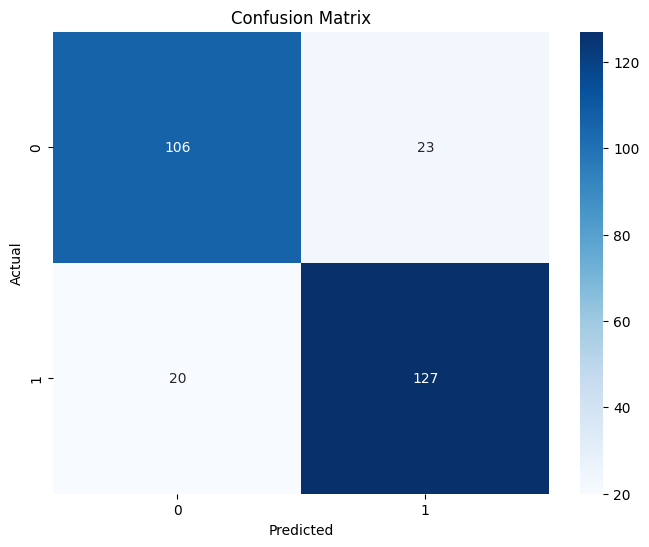

In [74]:
# Models testing
print('Logistic Regression Model')
logistic_regression(data)

Naive Gaussian Model

Training Accuracy: 0.8304821150855366

Training Precision: 0.8276631562463297

Training Recall: 0.8288540500186636

Training F1 Score: 0.828206768585176

Test Accuracy: 0.8333333333333334

Test Precision: 0.8332185430463577

Test Recall: 0.831672203765227

Test F1 Score: 0.8322676108439465


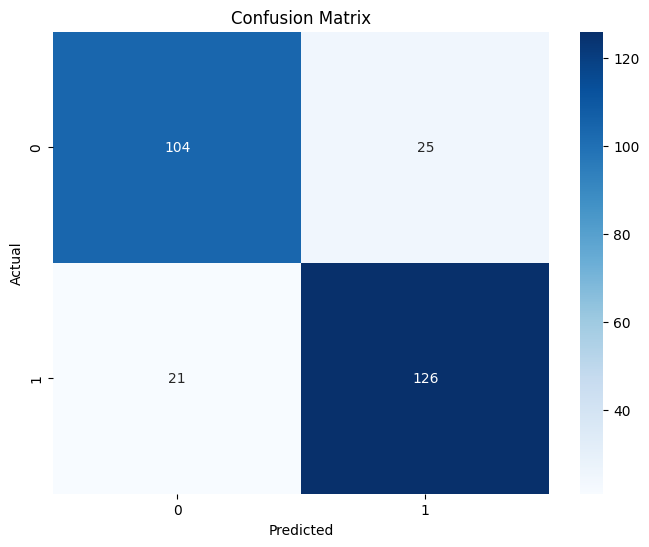

In [75]:
print('Naive Gaussian Model')
naive_gaussian_model(data)

KNN Model

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

Training Accuracy: 1.0

Training Precision: 1.0

Training Recall: 1.0

Training F1 Score: 1.0

Test Accuracy: 0.8442028985507246

Test Precision: 0.8458333333333333

Test Recall: 0.8414016769498497

Test F1 Score: 0.8426975227643245


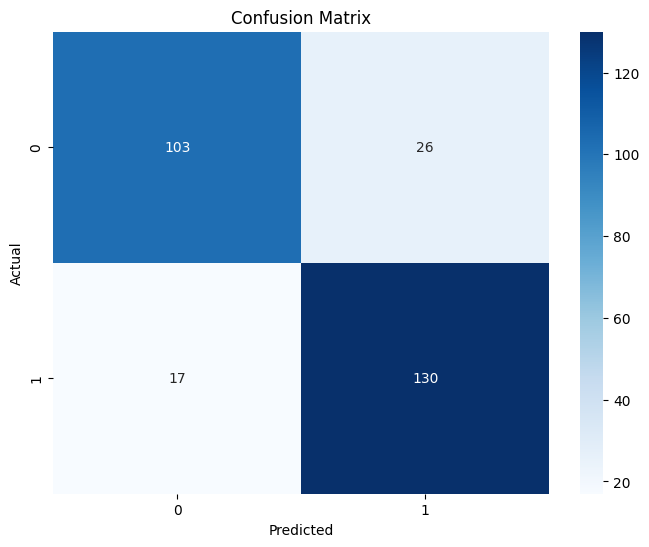

In [76]:
print('KNN Model')
KNN_model(data)


SVM Model

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

Training Accuracy: 0.864696734059098

Training Precision: 0.8645398412231697

Training Recall: 0.8624934214373429

Training F1 Score: 0.863342884991682

Test Accuracy: 0.8297101449275363

Test Precision: 0.8253205128205128

Test Recall: 0.8273665537816481

Test F1 Score: 0.8262407072533655


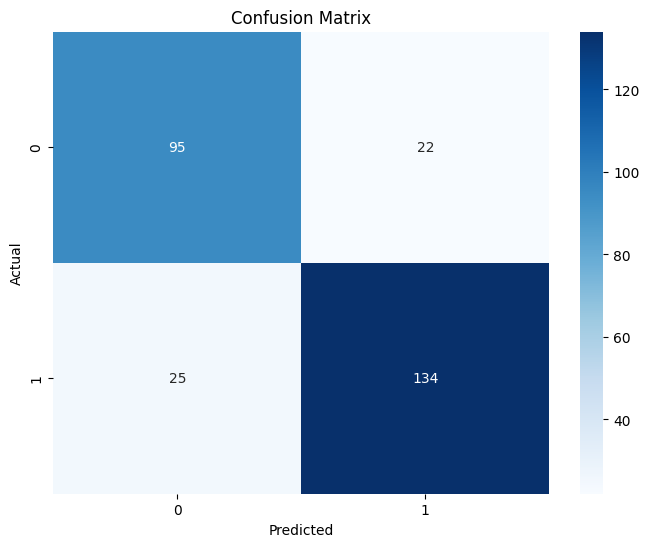

In [77]:
print('SVM Model')
SVM_model(data)


Random Forest Model

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Training Accuracy: 0.9751166407465007

Training Precision: 0.9758264866979656

Training Recall: 0.9741291932245677

Training F1 Score: 0.9748906591690096

Test Accuracy: 0.8369565217391305

Test Precision: 0.8338206627680311

Test Recall: 0.8313981615868409

Test F1 Score: 0.8325039446534774


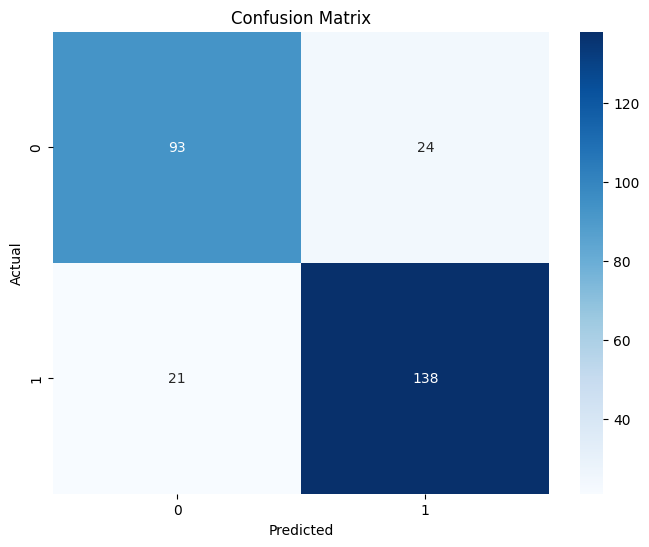

In [78]:
print('Random Forest Model')
train_rf(data_1,'target')


XGBoost Model

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 2, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}

Training Accuracy: 0.9206842923794712

Training Precision: 0.9202323883924168

Training Recall: 0.9184986542504077

Training F1 Score: 0.919307173105836

Test Accuracy: 0.8695652173913043

Test Precision: 0.8732462506047411

Test Recall: 0.8661604176554343

Test F1 Score: 0.8680057388809183


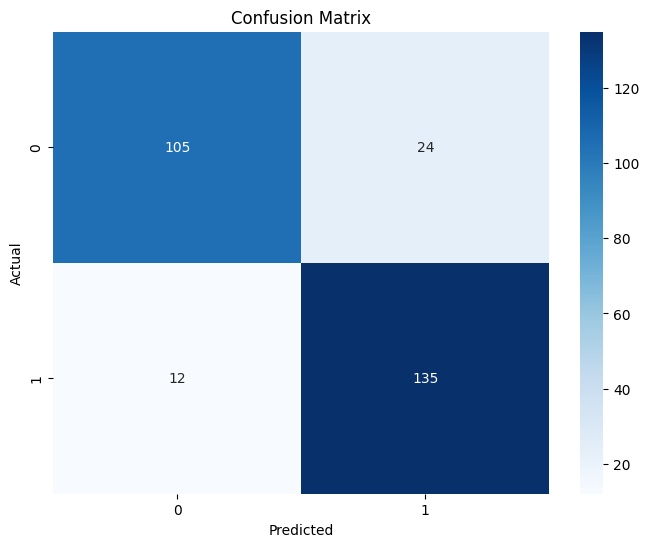

In [ ]:
print('XGBoost Model')
train_xgb(data_1,'target')